Goal: Write a script to simulate buildings

In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Install/Import Packages
import shapely
import geopandas
import torch
import torch_geometric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I want to generate list of points that make-up the structure of cuboids/cubes and geometries in 3d
1. Create 1d rings of the underlying 3d geometry [use shapely.linearings, takes input as list of points[list of x and y values] in order/direction]
**NOTE** 
cannot take a point in three dimension (x,y,z) because of loss of direction/order
2. create 2d polygon from rings   [use shapely.Polygon , takes input as list of linearrings]
3. force 2d polygon to 3d         [use shapely.force_3d, takes input as geometries[polygons, linearrings]]

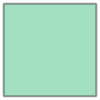

In [3]:
temp = []
#p = shapely.points([1.0,0.0])
#print(list(p.coords))
sqring = shapely.linearrings([[0, 0], [0, 10], [10, 10], [10,0],[0, 0]]) # a square ring 1d
triaring = shapely.linearrings([[0, 0], [0, 10], [10, 1],[0, 0]])       # a triangular ring 1d
sqpolygon = shapely.Polygon(sqring).buffer(0.1) # put the buffer distance small to preserve shape of the geometry, otherwise all geometries will get approximated to circular patch
sqpolygon  # 2d
#print(sqpolygon)

In [4]:
print(sqpolygon)

POLYGON ((0 -0.1, -0.009801714032956 -0.0995184726672197, -0.0195090322016129 -0.098078528040323, -0.0290284677254462 -0.0956940335732209, -0.038268343236509 -0.0923879532511286, -0.0471396736825998 -0.0881921264348355, -0.0555570233019602 -0.0831469612302545, -0.0634393284163646 -0.0773010453362737, -0.0707106781186548 -0.0707106781186548, -0.0773010453362737 -0.0634393284163645, -0.0831469612302546 -0.0555570233019602, -0.0881921264348355 -0.0471396736825998, -0.0923879532511287 -0.038268343236509, -0.0956940335732209 -0.0290284677254462, -0.098078528040323 -0.0195090322016128, -0.0995184726672197 -0.0098017140329561, -0.1 0, -0.1 10, -0.0995184726672197 10.009801714032957, -0.098078528040323 10.019509032201613, -0.0956940335732209 10.029028467725446, -0.0923879532511287 10.03826834323651, -0.0881921264348355 10.047139673682599, -0.0831469612302545 10.05555702330196, -0.0773010453362737 10.063439328416365, -0.0707106781186548 10.070710678118655, -0.0634393284163645 10.077301045336274

In [5]:
#with buffering point geometries gotten cylinders

N = 100  # number of instances

nx=ny=nz=121 # upper limit of interval value, doesn't has to be same

x = np.random.randint(nx,size=100)   # generate 100 x coordinate of cylinder's footprint between[0,120]
y = np.random.randint(ny,size=100)   # generate 100 y coordinate of cylinder's footprint between[0,120]
z = np.random.randint(1,nz,size=100) # generate 100 z coordinate of cylinder's footprint between[1,120]

area = {}         # to store patch's area
patch2d = {}      # to store 2d patch
cylinder3d = {}   # to store 3d cylinder
volume = {}       # to store cylinder's volume

for i in range(N):
    
    patch = shapely.Point(x[i],y[i]).buffer(0.1)
    
    patch2d[i] = patch
    
    area[i] = patch.area
    
    build_3d = shapely.force_3d(patch,z[i])
    
    cylinder3d[i] = build_3d
    
    volume[i] = patch.area*z[i]   

In [6]:
# with buffering SquareRing geometries is equivalent to squarepatch, after force3d, results in cuboids 

N = 100        # Number of instances
#choose a interval from which x and y coordinates of points are randomly drawn, doesn't has to be same interval[0,120]
nx1 = 121
nx2 = 121
ny1 = 121
ny2 = 121
nz = 121
buffer_dist = 0.1  # buffer distance to the polygon

x1 = np.random.randint(nx1,size=N) # generate 100 x1 coordinates randomly from discrete uniform distribution

y1 = np.random.randint(ny1,size=N) # generate 100 y1 coordinates randomly from discrete uniform distribution

x2 = np.random.randint(nx2,size=N) # generate 100 x2 coordinates randomly from discrete uniform distribution

y2 = np.random.randint(ny2,size=N) # generate 100 y2 coordinates randomly from discrete uniform distribution

z = np.random.randint(1,nz,size=N) # generate 100 z coordinates randomly from discrete uniform distribution

square_boundaries1d = {}  # dict to store a square ring

area_quadrilateral = {}   # dict to store the area of a square polygon: quadrilateral

quadrilateral2d = {}      # dict to store a quadrilateral

cuboid3d = {}             # dict to store a cuboid

volume_cuboid = {}        # dict to store the volume of a cuboid

size_label = {}                # temporary list to store square points

for i in range(N):
    
    #if not coord:
    #    continue 
    #else:
    #    print("coord is NOT empty \n",len(coord))
    #    break
    
    # put the points in order, either clockwise or anti-clockwise
    
    square_ring = shapely.linearrings([[x1[i],y1[i]],[x2[i],y1[i]],[x2[i],y2[i]],[x1[i],y2[i]],[x1[i],y1[i]]])
    
    #coord.append(list(p1.coords))
    
    #p2 = shapely.Point()
    
    #coord.append(list(p2.coords))
    
    #p3 = shapely.Point()
    
    #coord.append(list(p3.coords))
    
    #p4 = shapely.Point()
    
    #coord.append(list(p4.coords))
    
    #square_ring = shapely.linearrings(coord) # create squarering geometry
    
    square_boundaries1d[i] = square_ring
    
    if square_ring.is_closed:
        
        quadrilateral = shapely.Polygon(square_ring).buffer(buffer_dist)
        
        quadrilateral2d[i] = quadrilateral
        
        area_quadrilateral[i] = quadrilateral.area
        
        force_cuboid = shapely.force_3d(quadrilateral,z[i])
        
        cuboid3d[i] = force_cuboid
        
        volume_cuboid[i] = quadrilateral.area*z[i]
        
        if z[i]<25:
            size_label[i] = 'Small'
        elif 25<=z[i]<=100:
            size_label[i] = 'Medium'
        elif z[i]>100:
            size_label[i] = 'Large'